In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def imshow(img):
    if img.ndim == 2:
        plt.imshow(img, cmap="gray")
    else:
        plt.imshow(img[..., ::-1])
    plt.axis("off")
    plt.show()

In [3]:
foreground = cv2.imread("../../data/example/dog.jpg")
background = cv2.imread("../../data/example/lab_table_4_img_000230.png")
foreground = cv2.resize(foreground, (256,256))
background = cv2.resize(background, (256,256))

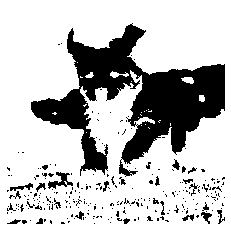

In [4]:
#grayscaleに変換する
gray = cv2.cvtColor(foreground, cv2.COLOR_BGR2GRAY)

# 2値化する。
_, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)
imshow(binary)

In [5]:
# 輪郭抽出する。
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

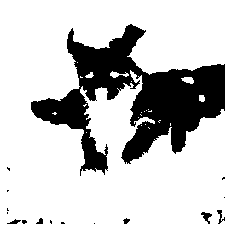

In [6]:
# 検出された輪郭内部を255で塗りつぶす。
mask = np.zeros_like(binary)
cv2.drawContours(mask, contours, -1, color=255, thickness=-1)

# 以上の手順で前景画像のうち、合成する画素を255としたマスク画像が作成できた。
imshow(mask)

In [24]:
bgr = cv2.imread("../../data/example/dog.jpg")
bgr = cv2.cvtColor(bgr, cv2.COLOR_RGB2BGR)
h, w = bgr.shape[:2]
mask = np.zeros((h,w), dtype = np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect=(1,1,w,h)
cv2.grabCut(bgr, mask, rect, bgdModel, fgdModel, 10, cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
bgr2 = bgr*mask2[:,:,np.newaxis]
bgr2 = cv2.resize(bgr2, (256,256))

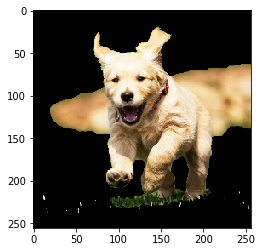

In [25]:
plt.imshow(bgr2)

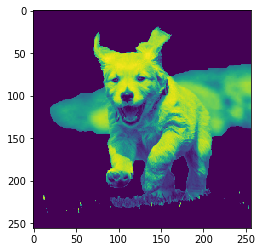

In [26]:
#grayscaleに変換する
gray = cv2.cvtColor(bgr2, cv2.COLOR_BGR2GRAY)

plt.imshow(gray)

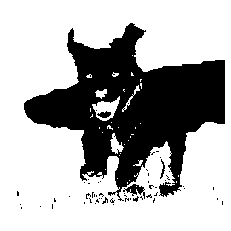

In [27]:
# 2値化する。
_, binary = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY_INV)

imshow(binary)

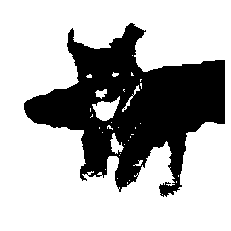

In [28]:
# 輪郭抽出する。
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# 検出された輪郭内部を255で塗りつぶす。
mask = np.zeros_like(binary)
cv2.drawContours(mask, contours, -1, color=(255,255,255), thickness=-1)

# 以上の手順で前景画像のうち、合成する画素を255としたマスク画像が作成できた。
mask = cv2.resize(mask, (256,256))
imshow(mask)

In [29]:
h, w = bgr2.shape[:2]  # 前景画像の大きさ
x, y = random.randint(0,256), random.randint(0,256)  # 背景画像の座標上で前景画像を貼り付ける位置
roi = background[y : y + h, x : x + w, :]
result = np.where(np.expand_dims(mask == 255, -1), bgr2, roi)

imshow(result)

ValueError: operands could not be broadcast together with shapes (256,256,1) (256,256,3) (243,229,3) 

In [30]:
h, w = foreground.shape[:2]  # 前景画像の大きさ
x, y = random.randint(0,256), random.randint(0,256)  # 背景画像の座標上で前景画像を貼り付ける位置
roi = background[y : y + h, x : x + w, :]
result = np.where(np.expand_dims(mask == 255, -1), foreground, roi)

imshow(result)

ValueError: operands could not be broadcast together with shapes (256,256,1) (256,256,3) (23,179,3) 

In [15]:
np.expand_dims(mask==255,-1)

array([[[ True],
        [ True],
        [ True],
        ...,
        [ True],
        [ True],
        [ True]],

       [[ True],
        [ True],
        [ True],
        ...,
        [ True],
        [ True],
        [ True]],

       [[ True],
        [ True],
        [ True],
        ...,
        [ True],
        [ True],
        [ True]],

       ...,

       [[ True],
        [ True],
        [ True],
        ...,
        [ True],
        [ True],
        [ True]],

       [[ True],
        [ True],
        [ True],
        ...,
        [ True],
        [ True],
        [ True]],

       [[ True],
        [ True],
        [ True],
        ...,
        [ True],
        [ True],
        [ True]]])

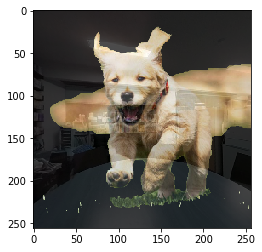

In [32]:
blended = cv2.addWeighted(src1=bgr2,alpha=0.7,src2=background,beta=0.3,gamma=0)
plt.imshow(blended)

In [37]:

rows,cols,channels = background.shape
roi = background[200:256,200:256]
final_roi = cv2.bitwise_or(roi,mask)
plt.imshow(final_roi)

error: OpenCV(4.1.2) /Users/travis/build/skvark/opencv-python/opencv/modules/core/src/arithm.cpp:229: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and type), nor 'array op scalar', nor 'scalar op array' in function 'binary_op'


In [40]:
size_rate = 0.8
background = cv2.resize(background , (int(background.shape[1]*size_rate), int(background.shape[0]*size_rate)))
mask = cv2.resize(mask , (int(mask.shape[0]*size_rate), int(mask.shape[1]*size_rate)))

output = cv2.seamlessClone(background, bgr2, mask, 
(background.shape[0]//2,bgr2.shape[0]-background.shape[0]//2), cv2.NORMAL_CLONE)

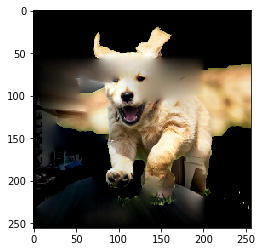

In [43]:
plt.imshow(output)
plt.show()